In [1]:
import pandas as pd 
from sklearn import metrics

import matplotlib.pyplot as plt
import scikitplot as skplt

In [2]:
df = pd.read_csv('./data/sample_auth.csv')
df

,ad,authority
0,How are health and climate change connected?Wa...,1
1,Crime is on the rise in California. Hear a cri...,1
2,Researchers at QIMR Berghofer are conducting a...,1
3,Hear a policy expert discuss how Prop 12 will ...,1
4,"As Toronto’s former chief of police, Mark Saun...",1
...,...,...
195,Families are often the foundation of a strong ...,0
196,Proven leadership you can count on. With nearl...,1
197,"If elected, the Ontario Liberals will implemen...",1
198,"If elected, the Ontario Liberals will implemen...",1


In [3]:
# creating prediction model

# creating the filters 
filters =  [ 'expert', 'president','founder','ceo','teacher','police', 'college', 'universit', 'journal','state official',
            'conclusive', 'decisive', 'approved', 'official', 'sanctioned', 'accurate', 'comprehensive', 'exhaustive', 
            'predominant','proven', 'skilful', 'proficient', 'adept', 'qualified', 'expertise','dr', 'phd', 
            'research','professional','scientist','academic','authorities', 'precise','reliable','professor','company',
            'administration', 'institution', 'association' , 'commission',  'recognized',  'known', 'well known',  'well established',
            'senator', 'governor', 'elected', 'officials', 'officer', 'mayor', 'sheriff', 'leader', 'judge', 'attorney', 'senior']

def contains_filter(x):
    for filter in filters:
        if filter in x:
            return 1
    return 0

def predict(X): 
    '''
        This function takes in a dataframe and returns the predicted values 
        params:
            X: dataframe
        returns:
            predicted values using the filters 
    '''
    X['prediction'] = X['ad'].apply(contains_filter)
    return X['prediction']


accuracy:   0.680
              precision    recall  f1-score   support

no-authority       0.66      0.77      0.71       102
   authority       0.71      0.58      0.64        98

    accuracy                           0.68       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.68      0.68      0.68       200

confusion matrix:
[[79 23]
 [41 57]]



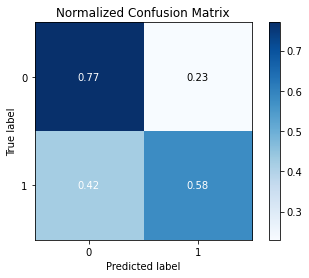

In [4]:
y_pred = predict(df)

# model performance
score = metrics.accuracy_score(df['authority'], y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(df['authority'], y_pred, target_names=['no-authority', 'authority']))

print("confusion matrix:")
print(metrics.confusion_matrix(df['authority'], y_pred))
print()

skplt.metrics.plot_confusion_matrix(df['authority'], y_pred, normalize=True)
plt.show()